In [1]:
# Importing base libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# Importing libraries needed for API requests
import json
import requests
from config import weather_api_key

# Importing random library for randomizing longitudes
import random

# Importing library which returns the nearest city for given (latitude, longitude)
from citipy import citipy

In [2]:
# Generating a list of 500 cities at about equal latitudes, random longitudes
city_list=[]

#adding x iterations through whole range of latitudes
x=2000
for instance in range(int(-x/2),int(x/2)):
    #considering corresponding latitude proportional to the number of iterations
    lat=instance*90/(x/2)
    
    # considering random longitudes within the whole range
    long=random.uniform(-180,180)
    
    city=citipy.nearest_city(lat,long)
    
    # adding only unique items
    if (city.city_name,city.country_code) not in city_list:
        city_list.append((city.city_name,city.country_code))
len(city_list)

# Create blank dataframe
city_data_df=pd.DataFrame(city_list)
city_data_df=city_data_df.rename(columns={0:"City",1:"Country Code"})
city_data_df["Lat [deg]"]=""
city_data_df["Long [deg]"]=""
city_data_df["Temperature [F]"]=""
city_data_df["Humidity [%]"]=""
city_data_df["Cloudiness [%]"]=""
city_data_df["Wind Speed [mph]"]=""

city_data_df

,City,Country Code,Lat [deg],Long [deg],Temperature [F],Humidity [%],Cloudiness [%],Wind Speed [mph]
0,ushuaia,ar,,,,,,
1,new norfolk,au,,,,,,
2,mataura,pf,,,,,,
3,albany,au,,,,,,
4,hermanus,za,,,,,,
...,...,...,...,...,...,...,...,...
764,longyearbyen,sj,,,,,,
765,leningradskiy,ru,,,,,,
766,mehamn,no,,,,,,
767,berlevag,no,,,,,,


In [3]:
# Saving config information for API requests
url = "http://api.openweathermap.org/data/2.5/weather?"

#Populating dataframe
not_found=[]
for index,row in city_data_df.iterrows():
    try:
        # Build query URL
        query_url = url + "appid=" + weather_api_key + "&q=" + row["City"]
        # Get weather data
        weather_response = requests.get(query_url).json()
        city_data_df.loc[index,"Lat [deg]"]=weather_response["coord"]["lat"]
        city_data_df.loc[index,"Long [deg]"]=weather_response["coord"]["lon"]
        city_data_df.loc[index,"Temperature [F]"]=weather_response["main"]["temp"]
        city_data_df.loc[index,"Humidity [%]"]=weather_response["main"]["humidity"]
        city_data_df.loc[index,"Cloudiness [%]"]=weather_response["clouds"]["all"]
        city_data_df.loc[index,"Wind Speed [mph]"]=weather_response["wind"]["speed"]
    except:
        # record not found cities and remove from dataframe
        not_found.append(row["City"])
        city_data_df=city_data_df.drop(index)

#print(json.dumps(weather_response, indent=4, sort_keys=True))
city_data_df

,City,Country Code,Lat [deg],Long [deg],Temperature [F],Humidity [%],Cloudiness [%],Wind Speed [mph]
0,ushuaia,ar,-54.8,-68.3,282.15,87,91,3.1
1,new norfolk,au,-42.78,147.06,285.17,47,75,5.7
2,mataura,pf,-46.19,168.86,292.04,59,1,1.79
3,albany,au,42.6,-73.97,277.48,56,1,7.2
4,hermanus,za,-34.42,19.23,289.26,94,0,0.45
...,...,...,...,...,...,...,...,...
764,longyearbyen,sj,78.22,15.64,252.15,63,40,8.7
765,leningradskiy,ru,69.38,178.42,256.97,94,44,3.73
766,mehamn,no,71.04,27.85,266.15,73,75,10.8
767,berlevag,no,70.86,29.09,266.15,73,75,10.8


In [6]:
# altered_df=altered_df.drop(1)
# altered_df
#altered_df.drop(1)

In [50]:
#define scatter chart formatting
def scatter_chart(x_values,y_values,x_axis_label,y_axis_label,title,regress):
#     pd.to_numeric(x_values)
#     pd.to_numeric(y_values)
    x_values.astype("float32")
    y_values.astype("float32")

    plt.scatter(x_values,y_values)
    if regress==True:
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        r_sq="r-sq="+str(round(rvalue,2))
        plt.plot(x_values,regress_values,"r-")
        
        # Indicate annotation position on chart
        x_location=round(np.percentile(x_values,30),0)
        y_location=round(np.percentile(regress_values,30),0)
        
        plt.annotate(line_eq,(x_location,y_location),fontsize=15,color="red")
        plt.annotate(r_sq,(x_location,y_location-10),fontsize=15,color="red")
        #plt.annotate(line_eq,(290,30),fontsize=15,color="red")
        #plt.annotate(r_sq,(280,30),fontsize=15,color="red")
        
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.title(title)
    #saving plots to the Images folder
    plt.savefig(f"Images/{title}.png")
    plt.show()

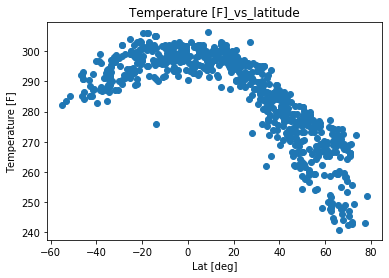

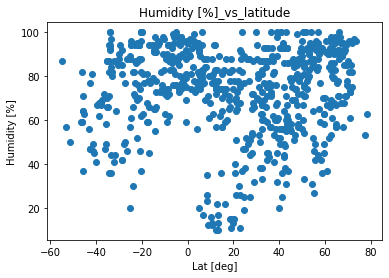

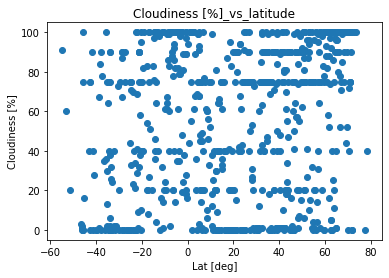

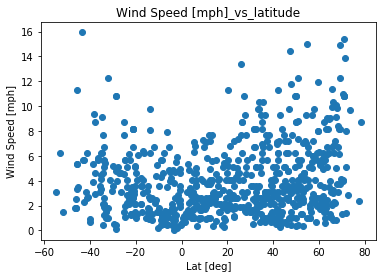

In [52]:
#print overall parameters vs latitude without regression
parameter_vs_latitude=["Temperature [F]","Humidity [%]","Cloudiness [%]","Wind Speed [mph]"]
regress=False

for y_parameter in parameter_vs_latitude:
    x_values=city_data_df["Lat [deg]"]
    y_values=city_data_df[y_parameter]
    x_axis_label="Lat [deg]"
    y_axis_label=y_parameter
    #title=f"{region}:{y_parameter}_vs_latitude"
    title=f"{y_parameter}_vs_latitude"
    scatter_chart(x_values,y_values,x_axis_label,y_axis_label,title,regress)
 


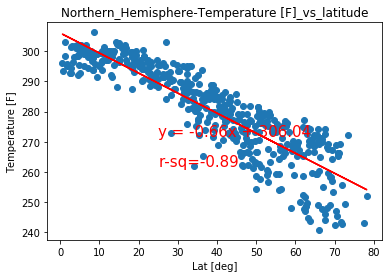

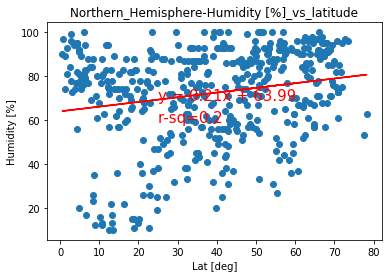

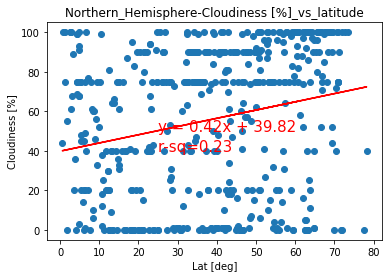

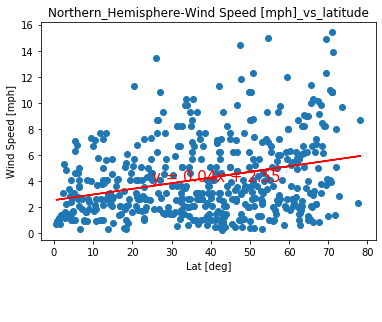

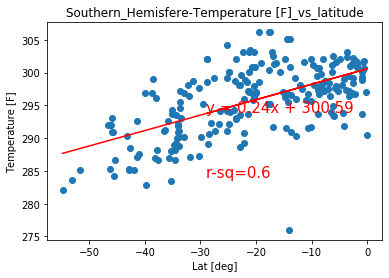

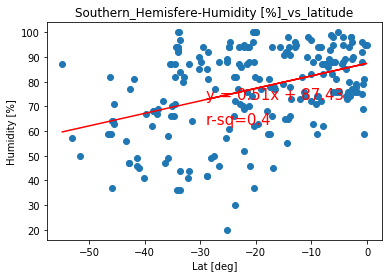

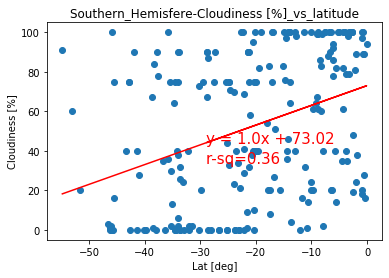

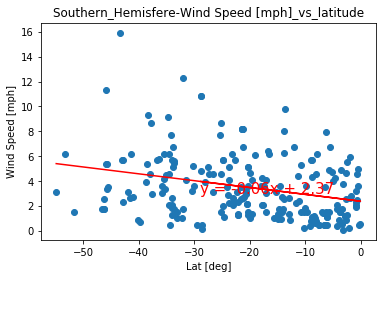

In [53]:
# Divide into northern and southern hemisfere and print with regression
# city_data_df
northern_hemisphere_df=city_data_df[city_data_df["Lat [deg]"]>=0]
southern_hemisphere_df=city_data_df[city_data_df["Lat [deg]"]<0]

regions=["Northern_Hemisphere","Southern_Hemisfere"]
regress=True
for region in regions:
    for y_parameter in parameter_vs_latitude:
        if region=="Northern_Hemisphere":
            data_used_df=northern_hemisphere_df
        elif region=="Southern_Hemisfere":
            data_used_df=southern_hemisphere_df
        x_values=data_used_df["Lat [deg]"].astype("float32")
        y_values=data_used_df[y_parameter].astype("float32")
        x_axis_label="Lat [deg]"
        y_axis_label=y_parameter
        title=f"{region}-{y_parameter}_vs_latitude"
        scatter_chart(x_values,y_values,x_axis_label,y_axis_label,title,regress)
